In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_diabetes

In [8]:
data= load_diabetes()

In [9]:
X=data.data
y= data.target


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=45, test_size=0.2)

In [11]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [12]:
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred= lr.predict(X_test)

**Measurement**

In [16]:
from sklearn.metrics import r2_score, mean_squared_error

print('R2score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2score: 0.5188113124539249
RMSE: 48.72713760953253


**Ridge**

In [19]:
from sklearn.linear_model import Ridge
R= Ridge(alpha= 0.0001)

In [22]:
R.fit(X_train, y_train)

Ridge(alpha=0.0001)

In [23]:
y_pred1= R.predict(X_test)

In [24]:

print('R2score:', r2_score(y_test, y_pred1))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred1)))

R2score: 0.5189732635884949
RMSE: 48.71893700181956


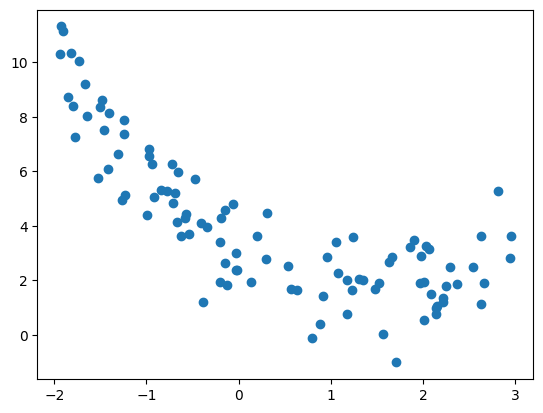

In [25]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

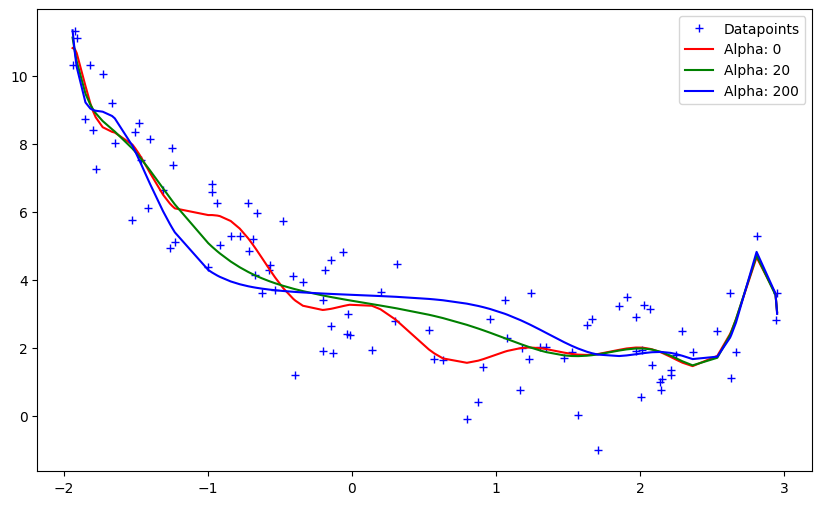

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()